In [1]:
# Imports
import torch
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
def seed_all(seed=42):
    """
    Sets the numpy and torch random seed.
    """
    np.random.seed(seed)
    torch.random.seed = seed

seed_all()

In [3]:
# Create some X data
X = np.random.uniform(0, 10, 100)

In [4]:
# Define the slope (m), bias (b), and some noise we want to add to X to make y
m = 3
b = 1.8
noise = np.random.normal(scale=3, size=100)

# Exercise 2.1

Based on your knowledge of linear regression, please use the variables `X`, `m`, `b`, and `noise` to generate a new variable `y`.

<!-- startquestion -->

In [5]:
y = m * X + b + noise

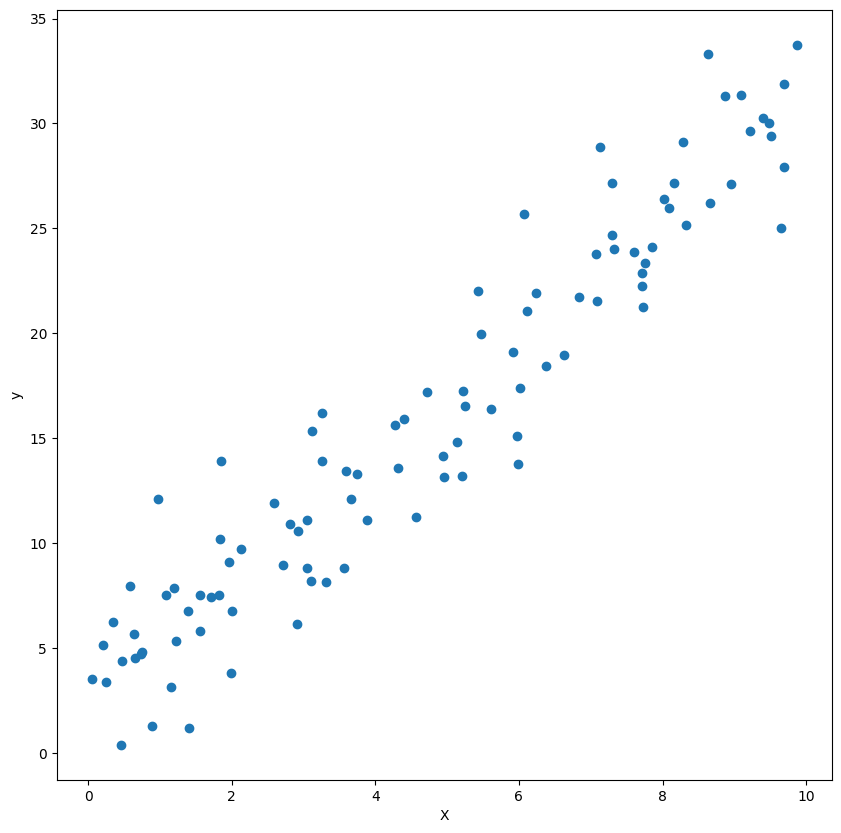

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.scatter(X, y)

# Exercise 2.2

Please complete the `mse` function below.
There is a sanity check implemented that shoudl let you know if you've implemented the function correctly.

<!-- startquestion -->

In [7]:
# Define MSE
def mse(predictions:torch.Tensor, actuals:torch.Tensor) -> torch.Tensor:
    # your code here
    return ((predictions - actuals) ** 2).mean()
    # raise NotImplementedError("Implement MSE, then remove this line")

In [8]:
ys = torch.tensor([1,2,3])
yhats = torch.tensor([1.1, 2.1, 3.1])

In [10]:
assert mse(ys, yhats) == 0.01

AssertionError: 

In [11]:
print(mse(ys, yhats))
print(mse(ys, yhats).numpy())

tensor(0.0100)
0.009999989


In [13]:
assert torch.allclose(mse(ys, yhats), torch.tensor(0.01))

In [14]:
# Now that we've defined MSE, let's just use Torch's.
mse_loss = nn.MSELoss()
mse_loss(ys, yhats)

tensor(0.0100)

In [15]:
# We can also use the functional API to calculate MSE
F.mse_loss(ys, yhats)

tensor(0.0100)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Exercise 2.3

In the exercise below, use the notebook to fit a `LinearRegression` model. 
We will inspect the parameters (the coefficient and intercept), and calculate the mean squared error.
In the cells below, complete the exercise to determine the coefficient and intercept learned by a `LinearRegression`.

<!-- startquestion -->

In [17]:
# your code here
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)
y_pred = lr.predict(X.reshape(-1, 1))

In [18]:
# Display the slope and intercept
lr.coef_, lr.intercept_

(array([2.86206803]), 2.4452884726402466)

In [19]:
# Calculate the mean squared error
mean_squared_error(y, lr.predict(X.reshape(-1, 1)))

7.259261075703482

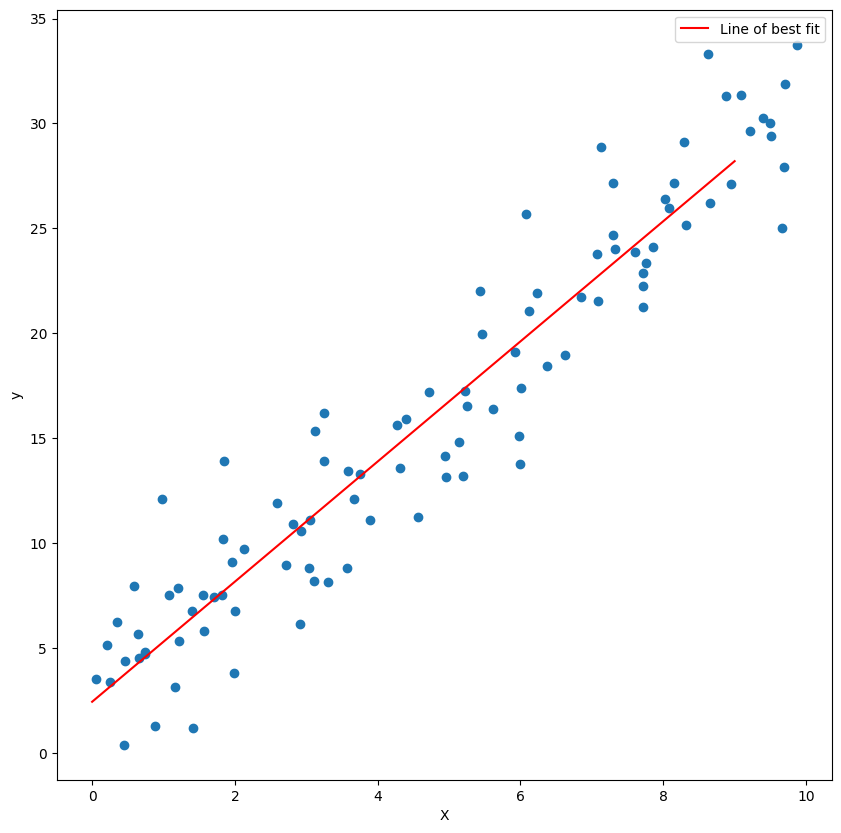

In [20]:
# Plot our line of best fit
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.scatter(X, y)
_x = np.arange(0, 10)
_y = _x * lr.coef_[0] + lr.intercept_
ax.plot(_x, _y, c='red', label=f"Line of best fit")
ax.legend()

In [21]:
# Because we're in torch now, let's just turn X and y into tensors.
X = torch.tensor(X)
y = torch.tensor(y)

# Exercise 2.4

In the exercise below, complete the `forward` method. 
What is the input `X`? 
How should that be transformed to the output for a linear regression?

<!-- startquestion -->

In [22]:
# Build our linear regression model
class LinReg(nn.Module):
    def __init__(self):
        super().__init__()
        # Randomly initialize 2 parameters, one for our slope and one for our bias.
        self.slope = nn.Parameter(torch.rand(1))
        self.bias = nn.Parameter(torch.rand(1))

    def forward(self, X):
        return X * self.slope + self.bias

In [23]:
lr = LinReg()

In [24]:
N_EPOCHS = 300
LR = 1e-3

In [25]:
slopes = []
biases = []
losses = []
_alphas = []
for i in range(N_EPOCHS):
    # Make some inferences
    yhat = lr(X)
    # Measure how bad those guesses were
    loss = F.mse_loss(yhat, y)
    if i%(N_EPOCHS/10)==0:
        print(f"Epoch {i} Train Loss: {loss:.04f}")
    # Calculate the gradient of all the parameters with respect to the loss
    loss.backward()
    # Apply the SGD update rule
    lr.slope.data.sub_(lr.slope.grad * LR)
    lr.bias.data.sub_(lr.bias.grad * LR)
    # Zero out the gradients for the next round
    lr.slope.grad.zero_()
    lr.bias.grad.zero_()

    # Record the parameters and losses so we can plot them out later
    slopes.append(float(lr.slope.data.detach().item()))
    biases.append(float(lr.bias.data.detach().item()))
    losses.append(float(loss.detach().item()))
    _alphas.append(i/N_EPOCHS)

Epoch 0 Train Loss: 192.3707
Epoch 30 Train Loss: 12.0101
Epoch 60 Train Loss: 8.3823
Epoch 90 Train Loss: 8.2764
Epoch 120 Train Loss: 8.2417
Epoch 150 Train Loss: 8.2095
Epoch 180 Train Loss: 8.1784
Epoch 210 Train Loss: 8.1483
Epoch 240 Train Loss: 8.1192
Epoch 270 Train Loss: 8.0910


In [26]:
lr.slope, lr.bias

(Parameter containing:
 tensor([3.1208], requires_grad=True),
 Parameter containing:
 tensor([0.7619], requires_grad=True))

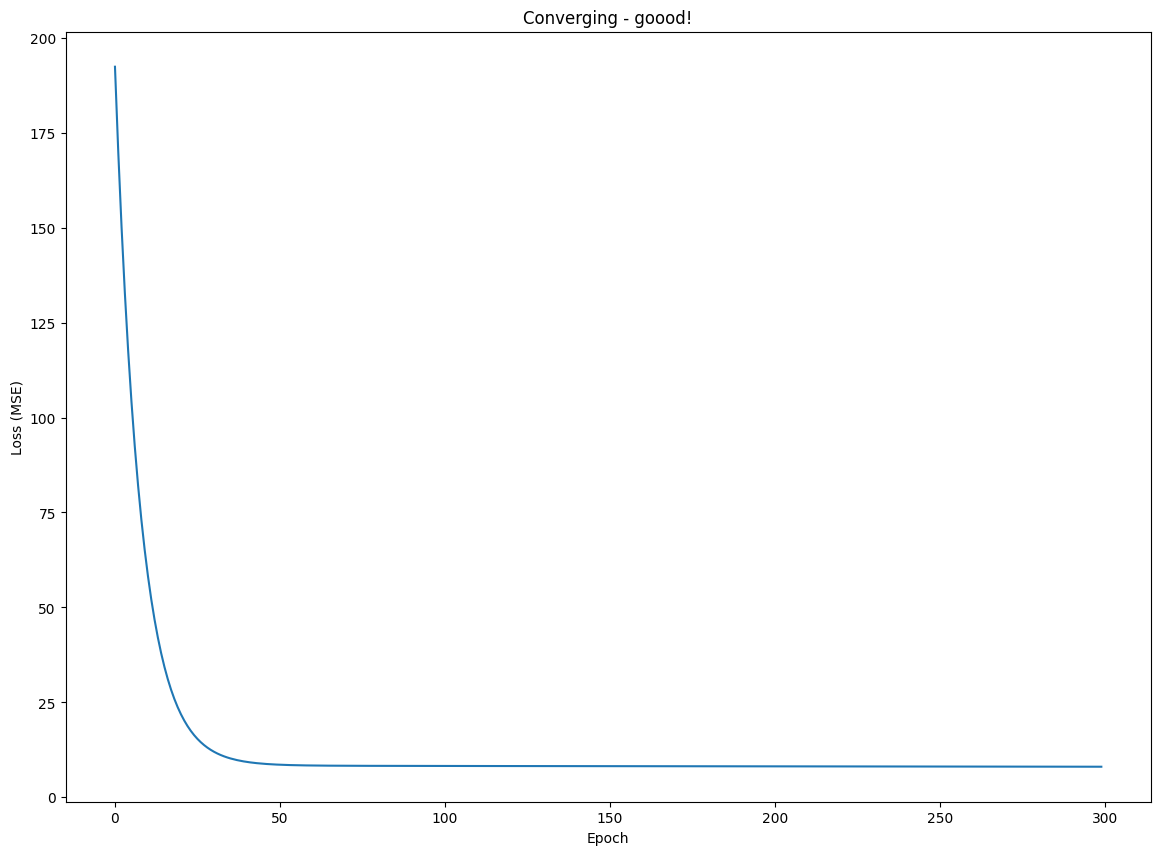

In [27]:
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(losses)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (MSE)')
if (losses[-1] > losses[0]) | np.isnan(losses[-1]):
    ax.set_title('Diverging - BAD!')
else:
    ax.set_title('Converging - goood!')

# Exercise 2.5

Change the learning rate and number of epochs, then re-run the code up to this point, making sure to re-instantiate your model every time.
What do you notice?
What happens if you make the learning rate too large or too small?

<!-- startquestion -->

In [28]:
# Go back and re-run the code with different hyperparameters.

In [29]:
# Make yet another fake dataset
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=3, n_informative=2, bias=3, noise=2)

In [30]:
# No more bad habits, we need to split our data.
X_train, X_valid, y_train, y_valid = (torch.tensor(i).float() for i in train_test_split(X, y, test_size=0.1, random_state=42))

# Exercise 2.6

Complete the exercise below to create a few `nn.Parameter`s for our weights and bias.
The `weights` parameter should have the same number of elements as `X_train` has columns, and the `bias` parameter should just be a single value.
Use `torch.rand` to generate random numbers to populate the parameters.

<!-- startquestion -->

In [31]:
# Let's create some temporary weights and biases and test out our matrix operations before we build our model.
# Create a weights parameter with 1 beta per column in X
weights = torch.rand(X_train.shape[1], 1, requires_grad=True)
# Create our bias parameter
bias = torch.rand(1, requires_grad=True)

In [32]:
# Test out the operation we want to perform in the forward pass
torch.matmul(X_train[:10], weights) + bias

tensor([[0.7575],
        [0.1615],
        [0.5939],
        [0.6216],
        [0.7190],
        [0.0892],
        [0.8685],
        [0.8616],
        [1.5525],
        [1.3185]], grad_fn=<AddBackward0>)

In [33]:
# FYI: @ does the same thing as matmul in this context and is easier
X_train[:10]@weights + bias

tensor([[0.7575],
        [0.1615],
        [0.5939],
        [0.6216],
        [0.7190],
        [0.0892],
        [0.8685],
        [0.8616],
        [1.5525],
        [1.3185]], grad_fn=<AddBackward0>)

In [34]:
# Sanity check: different implementations of our forward pass are the same
assert (X_train@weights + bias == torch.matmul(X_train, weights) + bias).all()

In [35]:
# Let's make our model
class LinRegMulti(nn.Module):
    def __init__(self, n_cols):
        super().__init__()
        self.n_cols = n_cols

        self.weights = nn.Parameter(torch.rand(self.n_cols))
        self.bias = nn.Parameter(torch.rand(1))
    
    def forward(self, X):
        return X@self.weights.T + self.bias

In [36]:
N_EPOCHS = 10000
LR = 1e-3

In [37]:
lrm = LinRegMulti(X_train.shape[1])

In [38]:
# Instead of updating each parameter individually, let's make an update rule function.
def gd_update_rule(parameters, lr):
    parameters.data.sub_(parameters.grad * lr)
    parameters.grad.zero_()

In [39]:
train_losses = []
valid_losses = []

In [40]:
for i in range(N_EPOCHS):
    yhat = lrm(X_train)
    loss = mse(yhat, y_train)
    loss.backward()
    for p in lrm.parameters():
        gd_update_rule(p, LR)
    train_losses.append(loss.detach().item())

    with torch.no_grad():
        yhat = lrm(X_valid)
        valid_loss = mse(yhat, y_valid)
        valid_losses.append(valid_loss.item())

    if i%(N_EPOCHS/10) == 0:
        print(f"Epoch {i} Train Loss: {loss:.04f}, Valid Loss: {valid_loss:.04f}")

C:\Users\3296422\AppData\Local\Temp\ipykernel_28104\384595919.py:11: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3679.)
  return X@self.weights.T + self.bias


Epoch 0 Train Loss: 2049.8813, Valid Loss: 2474.0654
Epoch 1000 Train Loss: 53.2907, Valid Loss: 64.5924
Epoch 2000 Train Loss: 5.3661, Valid Loss: 5.9566
Epoch 3000 Train Loss: 4.1692, Valid Loss: 4.2595
Epoch 4000 Train Loss: 4.1385, Valid Loss: 4.1794
Epoch 5000 Train Loss: 4.1377, Valid Loss: 4.1719
Epoch 6000 Train Loss: 4.1377, Valid Loss: 4.1711
Epoch 7000 Train Loss: 4.1377, Valid Loss: 4.1712
Epoch 8000 Train Loss: 4.1377, Valid Loss: 4.1712
Epoch 9000 Train Loss: 4.1377, Valid Loss: 4.1712


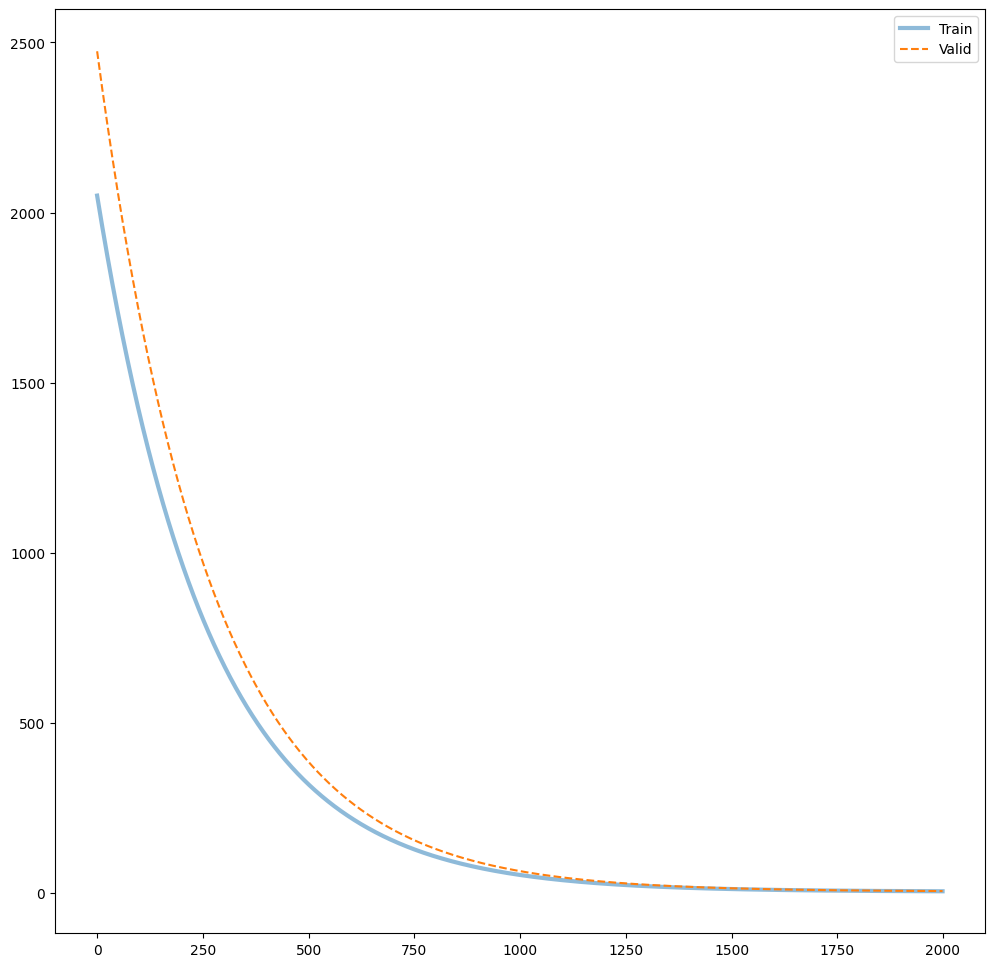

In [41]:
EPOCHS_TO_SHOW = 2000
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(train_losses[:EPOCHS_TO_SHOW], label='Train', linewidth=3, alpha=0.5)
ax.plot(valid_losses[:EPOCHS_TO_SHOW], ls='--', label='Valid')
ax.legend()

In [42]:
lrm.weights

Parameter containing:
tensor([2.7642e-02, 4.1119e+01, 2.4042e+01], requires_grad=True)

In [43]:
lrm.bias

Parameter containing:
tensor([2.9828], requires_grad=True)

In [44]:
class Linear(nn.Module):
    def __init__(self, dim_in, dim_out):
        super().__init__()
        self.weights = nn.Parameter(torch.rand((dim_in, dim_out)))
        self.bias = nn.Parameter(torch.rand(dim_out))
    
    def forward(self, X):

        return X@self.weights + self.bias

In [45]:
# Let's compare our Linear class with nn.Linear
l1 = Linear(3, 5)
l2 = nn.Linear(3, 5)

In [46]:
l2.weight

Parameter containing:
tensor([[ 0.3440,  0.4476,  0.3124],
        [ 0.3218,  0.4604,  0.1378],
        [ 0.5132,  0.4328, -0.1450],
        [-0.5137, -0.0496, -0.3960],
        [ 0.5002,  0.2640,  0.1520]], requires_grad=True)

In [47]:
l1.weights

Parameter containing:
tensor([[0.3771, 0.5456, 0.5464, 0.7770, 0.0583],
        [0.8647, 0.0278, 0.1161, 0.4564, 0.5190],
        [0.8660, 0.7729, 0.9644, 0.1263, 0.8626]], requires_grad=True)

In [48]:
# We need to make sure the weights have the same values.
# If they don't, we won't be able to compare the output.
# I'm not sure why the Linear layer's weights are transposed,
# but we'll see it doesn't matter.
l1.weights.data.copy_(l2.weight.T)
l1.bias.data.copy_(l2.bias)

tensor([-0.4582,  0.5756,  0.4620,  0.4518, -0.4415], grad_fn=<CopyBackwards>)

In [49]:
l1(X_train[:5])

tensor([[-1.1446, -0.1999, -0.7115,  0.9345, -1.2575],
        [-0.6873,  0.4511,  0.3364,  0.9747, -0.7617],
        [-0.2077,  0.8711,  0.7798,  0.5250, -0.3065],
        [-0.4458,  0.6132,  0.5927,  0.4063, -0.3615],
        [-1.0681, -0.0850, -0.2126,  0.4604, -0.8118]], grad_fn=<AddBackward0>)

In [50]:
l2(X_train[:5])

tensor([[-1.1446, -0.1999, -0.7115,  0.9345, -1.2575],
        [-0.6873,  0.4511,  0.3364,  0.9747, -0.7617],
        [-0.2077,  0.8711,  0.7798,  0.5250, -0.3065],
        [-0.4458,  0.6132,  0.5927,  0.4063, -0.3615],
        [-1.0681, -0.0850, -0.2126,  0.4604, -0.8118]],
       grad_fn=<AddmmBackward0>)

In [51]:
assert (l1(X_train[:5]) == l2(X_train[:5])).all()

In [52]:
%%timeit 
l1(X_train[:5])

20.5 μs ± 1.53 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [53]:
%%timeit
 l2(X_train[:5])

23.3 μs ± 1.59 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


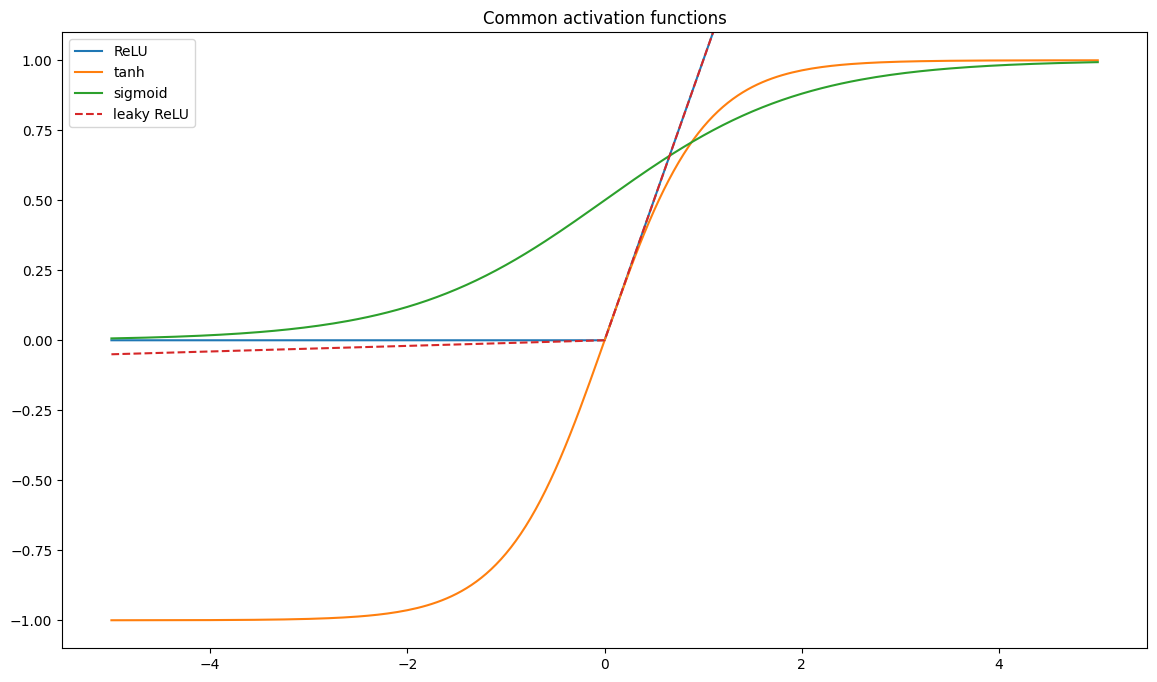

In [54]:
rng = torch.arange(-5, 5.01, 0.05)
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(rng, F.relu(rng), label='ReLU')
ax.plot(rng, torch.tanh(rng), label='tanh')
ax.plot(rng, torch.sigmoid(rng), label='sigmoid')
ax.plot(rng, F.leaky_relu(rng, negative_slope=0.01), ls='--', label='leaky ReLU')
ax.set_ylim(-1.1, 1.1)
ax.set_title('Common activation functions')
ax.legend()

In [55]:
class MultiLayerRegressor(nn.Module):
    def __init__(self, dim_in, hidden_dim):
        super().__init__()
        # self.first_layer = Linear(dim_in, hidden_dim)
        self.first_layer = nn.Linear(dim_in, hidden_dim)
        # self.second_layer = Linear(hidden_dim, 1)
        self.second_layer = nn.Linear(hidden_dim, 1)
    
    def forward(self, X):
        x = self.first_layer(X)
        # x = relu(x)
        x = F.relu(x)
        x = self.second_layer(x)
        return x

In [56]:
def multilayer_regressor(in_dim, hidden_dim):
    return nn.Sequential(
        nn.Linear(in_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, 1)
    )

In [57]:
# mlr = MultiLayerRegressor(3, 4)
mlr = multilayer_regressor(3, 4)

In [58]:
train_losses = []
valid_losses = []

In [59]:
LR = 1e-3
N_EPOCHS = 20000

In [60]:
# Notice that instead of iterating through our parameters and applying
# an update rule, we're just using torch's built in SGD optimizer.
opt = optim.SGD(mlr.parameters(), lr=LR)

In [61]:
for i in range(N_EPOCHS):
    yhat = mlr(X_train).squeeze()
    loss = F.mse_loss(yhat, y_train)
    loss.backward()
    opt.step()
    opt.zero_grad()
    train_losses.append(loss.detach().item())

    with torch.no_grad():
        yhat = mlr(X_valid).squeeze()
        valid_loss = F.mse_loss(yhat, y_valid)
        valid_losses.append(loss.item())
    
    if i%(N_EPOCHS/10) == 0:
        print(f"Epoch {i} Train loss: {loss:.04f}, Valid loss: {valid_loss:.04f}")

Epoch 0 Train loss: 2146.7415, Valid loss: 2605.9204
Epoch 2000 Train loss: 4.1144, Valid loss: 4.1873
Epoch 4000 Train loss: 4.1070, Valid loss: 4.1782
Epoch 6000 Train loss: 4.1060, Valid loss: 4.1764
Epoch 8000 Train loss: 4.1058, Valid loss: 4.1768
Epoch 10000 Train loss: 4.1058, Valid loss: 4.1769
Epoch 12000 Train loss: 4.1058, Valid loss: 4.1768
Epoch 14000 Train loss: 4.1058, Valid loss: 4.1767
Epoch 16000 Train loss: 4.1058, Valid loss: 4.1768
Epoch 18000 Train loss: 4.1058, Valid loss: 4.1769


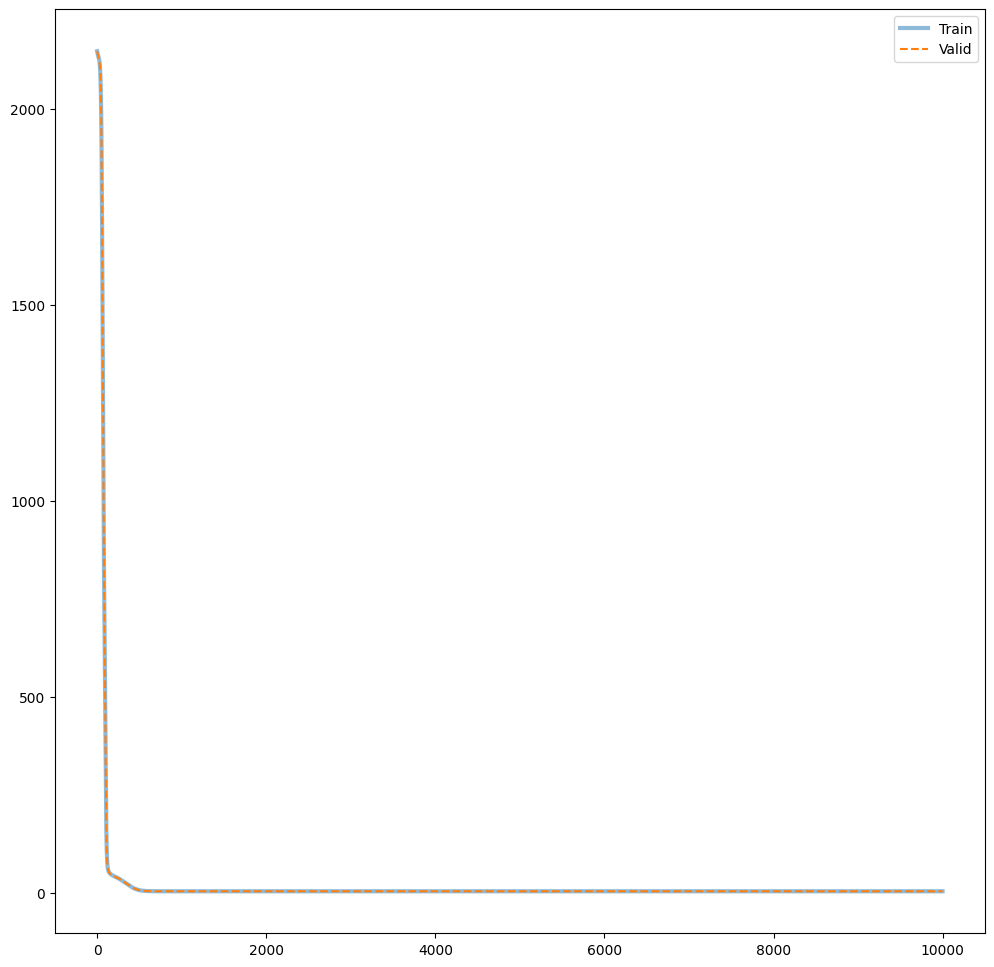

In [62]:
idx=10000
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(train_losses[:idx], label='Train', linewidth=3, alpha=0.5)
ax.plot(valid_losses[:idx], ls='--', label='Valid')
ax.legend()